# Trabalho 03 - Resistência dos Materiais MAC015 - Turma X 2024.3
___

- Ana Beatriz Lana Maciel Moreira Armond (202165501B)
- Gabriella Cruz e Silva (202165512B)

In [ ]:
# Importando Bibliotecas
import matplotlib.pyplot as plt

# Atividade 01
___

Escreva um programa computacional que possa ser utilizado para calcular os momentos de inércia e
e produto de inércia em relação aos eixos centroidais de seções transversais compostas por retângulos.

## Relatório da Atividade

Os momentos de inércia em torno dos eixos x e y são calculados usando o teorema dos eixos paralelos (Teorema de Steiner). Cada retângulo é analisado individualmente, levando em conta sua distância em relação ao centroide da seção composta.

### **Centroide da Seção Composta**  

$
x_c = \frac{\sum (x_i A_i)}{\sum A_i}, \quad y_c = \frac{\sum (y_i A_i)}{\sum A_i}
$

### **Momento de Inércia em relação ao eixo X**  

$
I_{x_i} = \frac{b h^3}{12}
$

Aplicando o **teorema dos eixos paralelos**:

$
I_x = \sum \left( I_{x_i} + A_i d_y^2 \right)
$

### **Momento de Inércia em relação ao eixo Y**  

$
I_{y_i} = \frac{h b^3}{12}
$

$
I_y = \sum \left( I_{y_i} + A_i d_x^2 \right)
$


### **Produto de Inércia**  

$
I_{xy_i} = \frac{b^2 h^2}{12}
$

Para a seção composta:

$
I_{xy} = \sum \left( I_{xy_i} + A_i d_x d_y \right)
$

Onde:  
- $( x_i, y_i )$ são as coordenadas do centro do $( i )$-ésimo retângulo
- $ A_i $ é a área do $( i )$-ésimo retângulo
- $ d_y $ ou $d_x$ é a distância entre o centro do retângulo e o centroide da seção composta.

Se um retângulo representar um recorte (área negativa), sua contribuição para o produto de inércia será subtraída da soma total.

## Bibliotecas Utilizadas

- `matplotlib.pyplot`: utilizada para gerar gráficos e visualizar a seção composta.

## Estrutura do Código

### Classe Rectangle
A classe Rectangle representa um retângulo e armazena suas propriedades geométricas:

- `width` e `height`: largura e altura do retângulo.
- `x_center` e `y_center`: coordenadas do centro do retângulo.
- `area`: cálculo automático da área do retângulo.
- `negative`: define se o retângulo representa uma subtração na seção composta.

Principais métodos:

- `moment_of_inertia_x()`: calcula o momento de inércia em relação ao eixo X.
- `moment_of_inertia_y()`: calcula o momento de inércia em relação ao eixo Y.
- `product_of_inertia()`: calcula o produto de inércia do retângulo.

### Classe CompositeSection
A classe CompositeSection representa uma seção composta por múltiplos retângulos. Seus principais atributos são a lista de retângulos que formam a seção e o cálculo do centroide.

Principais métodos:

- `calculate_centroid_x()` e `calculate_centroid_y()`: calculam as coordenadas do centroide da seção composta.
- `moment_of_inertia_x()` e `moment_of_inertia_y()`: calculam os momentos de inércia da seção composta.
- `product_of_inertia()`: calcula o produto de inércia considerando a contribuição de cada retângulo.
- `plot_section()`: gera um gráfico da seção composta com destaque para os centroides. A centróide da seção é marcada com um ponto azul e o centro de cada retângulo é marcado com um ponto vermelho.

In [ ]:
# Classe que representa um retângulo com algumas propriedades, como largura, altura e posição
class Rectangle:
    def __init__(self, width, height, x_center, y_center, negative=False):
        self.width = width  # Largura do retângulo
        self.height = height  # Altura do retângulo
        self.x_center = x_center  # Posição X do centro
        self.y_center = y_center  # Posição Y do centro
        self.area = width * height  # Área do retângulo
        self.negative = negative  # Indica se o retângulo é "negativo" (por exemplo, um recorte na seção)

    # Cálculo do momento de inércia em torno do eixo X (momento de inércia para um retângulo)
    def moment_of_inertia_x(self):
        return (self.width * self.height**3) / 12

    # Cálculo do momento de inércia em torno do eixo Y (momento de inércia para um retângulo)
    def moment_of_inertia_y(self):
        return (self.height * self.width**3) / 12

    # Cálculo do produto de inércia (momento de inércia misto)
    def product_of_inertia(self):
        return (self.width**2 * self.height**2) / 12

# Classe para representar uma seção composta por vários retângulos
class CompositeSection:
    def __init__(self, rectangles):
        self.rectangles = rectangles  # Lista de retângulos que compõem a seção
        # Calcula o centroide da seção (média ponderada das posições dos centros dos retângulos)
        self.x_centroid = self.calculate_centroid_x()
        self.y_centroid = self.calculate_centroid_y()

    # Cálculo do centroide no eixo X da seção composta
    def calculate_centroid_x(self):
        sum_moments = sum(r.x_center * r.area for r in self.rectangles)  # Soma dos momentos em X
        sum_areas = sum(r.area for r in self.rectangles)  # Soma das áreas dos retângulos
        return sum_moments / sum_areas  # Centroide em X é a média ponderada das posições

    # Cálculo do centroide no eixo Y da seção composta
    def calculate_centroid_y(self):
        sum_moments = sum(r.y_center * r.area for r in self.rectangles)  # Soma dos momentos em Y
        sum_areas = sum(r.area for r in self.rectangles)  # Soma das áreas dos retângulos
        return sum_moments / sum_areas  # Centroide em Y é a média ponderada das posições

    # Cálculo do momento de inércia em torno do eixo X para a seção composta
    def moment_of_inertia_x(self):
        return sum(r.moment_of_inertia_x() + r.area * ((r.y_center - self.y_centroid) ** 2) for r in self.rectangles)

    # Cálculo do momento de inércia em torno do eixo Y para a seção composta
    def moment_of_inertia_y(self):
        return sum(r.moment_of_inertia_y() + r.area * ((r.x_center - self.x_centroid) ** 2) for r in self.rectangles)

    # Cálculo do produto de inércia (momento de inércia misto) para a seção composta
    def product_of_inertia(self):
        if len(self.rectangles) == 1:
          return 0  # Produto de inércia é zero para um único retângulo alinhado

        return sum((-1 if r.negative else 1) * (r.product_of_inertia() + r.area * (r.x_center - self.x_centroid) * (r.y_center - self.y_centroid)) for r in self.rectangles)

    # Função para plotar a seção composta
    def plot_section(self):
        fig, ax = plt.subplots()  # Cria uma figura e um eixo para o gráfico
        for r in self.rectangles:
            # Calcula as coordenadas do canto inferior esquerdo de cada retângulo
            x_bottom_left = r.x_center - r.width / 2
            y_bottom_left = r.y_center - r.height / 2
            # Define a cor dependendo se o retângulo é "negativo" ou não
            color = 'red' if r.negative else 'blue'
            # Cria o retângulo com a cor e as coordenadas definidas
            rect = plt.Rectangle((x_bottom_left, y_bottom_left), r.width, r.height, facecolor=color, edgecolor='black', alpha=0.5)
            ax.add_patch(rect)
            plt.plot(r.x_center, r.y_center, 'ro')  # Plota o centro de cada retângulo

        # Plota o centroide da seção composta (ponto azul)
        plt.plot(self.x_centroid, self.y_centroid, 'bo', label='Centroide da seção')
        plt.xlabel("Eixo X")  # Rótulo do eixo X
        plt.ylabel("Eixo Y")  # Rótulo do eixo Y
        plt.grid()
        plt.axis("equal")
        plt.show()

___

# Exemplo 01

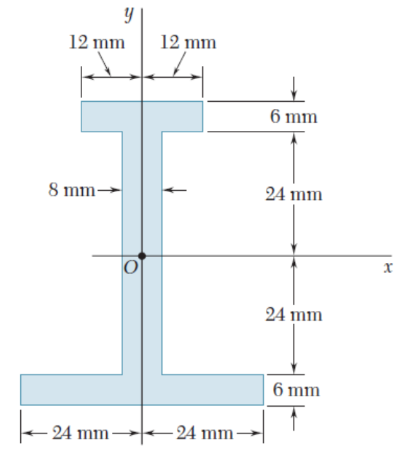

Centróide (x, y): (2.400e-02, 2.524e-02) metros
Momento de Inércia em X: 3.714e-07
Momento de Inércia em Y: 6.426e-08
Produto de Inércia: 2.093e-08


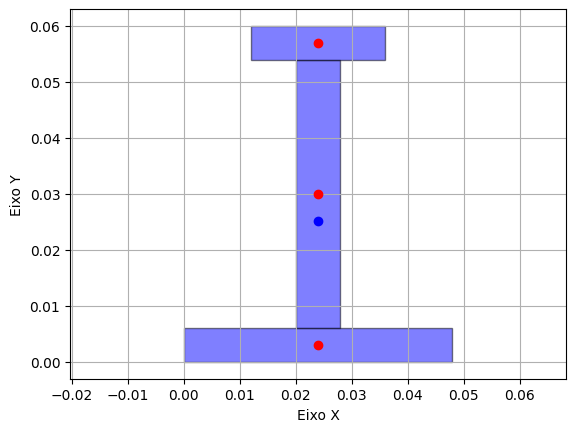

In [ ]:
# Seção composta 1
rect1 = Rectangle(0.048, 0.006, 0.024, 0.003)
rect2 = Rectangle(0.008, 0.048, 0.024, 0.030)
rect3 = Rectangle(0.024, 0.006, 0.024, 0.057)
section01 = CompositeSection([rect1, rect2, rect3])

# Exibe os resultados para a primeira seção composta (section)
print(f"Centróide (x, y): ({section01.x_centroid:.3e}, {section01.y_centroid:.3e}) metros")
print(f"Momento de Inércia em X: {section01.moment_of_inertia_x():.3e}")
print(f"Momento de Inércia em Y: {section01.moment_of_inertia_y():.3e}")
print(f"Produto de Inércia: {section01.product_of_inertia():.3e}")
section01.plot_section()  # Plota a seção composta

___
# Exemplo 02

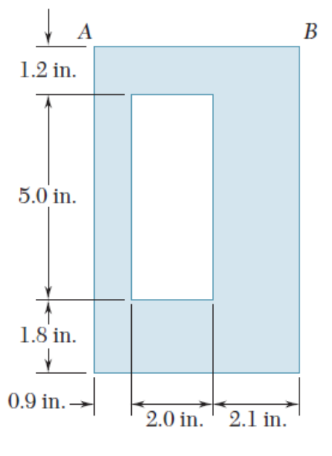

OBS: Polegadas serão tratadas como centímetros

Centroide (x, y): (2.380e-02, 4.060e-02) metros
Momento de Inércia em X: 2.349e-06
Momento de Inércia em Y: 8.955e-07
Produto de Inércia: 1.259e-06


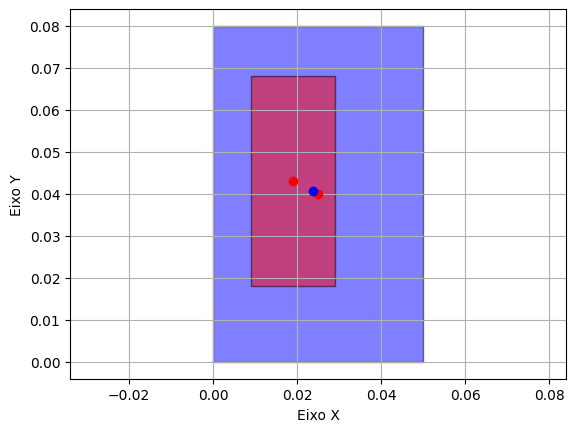

In [ ]:
# Seção composta 2
rect1 = Rectangle(0.05, 0.08, 0.025, 0.04)
rect2 = Rectangle(0.02, 0.05, 0.019, 0.043, negative=True)
section02 = CompositeSection([rect1, rect2])

# Exibe os resultados para a primeira seção composta (section)
print(f"Centroide (x, y): ({section02.x_centroid:.3e}, {section02.y_centroid:.3e}) metros")
print(f"Momento de Inércia em X: {section02.moment_of_inertia_x():.3e}")
print(f"Momento de Inércia em Y: {section02.moment_of_inertia_y():.3e}")
print(f"Produto de Inércia: {section02.product_of_inertia():.3e}")
section02.plot_section()  # Plota a seção composta

___
# Exemplo 03

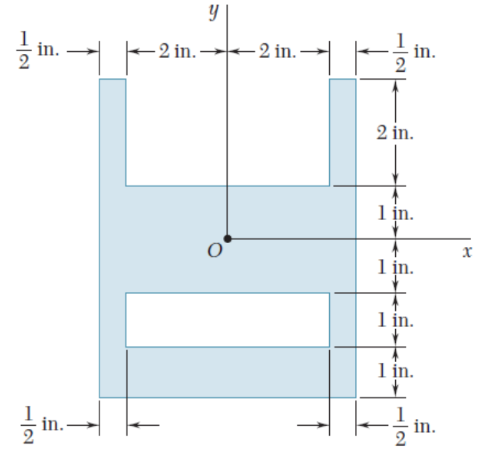

OBS: Polegadas serão tratadas como centímetros

Centroide (x, y): (2.500e-02, 3.238e-02) metros
Momento de Inércia em X: 1.316e-06
Momento de Inércia em Y: 7.850e-07
Produto de Inércia: 6.833e-07


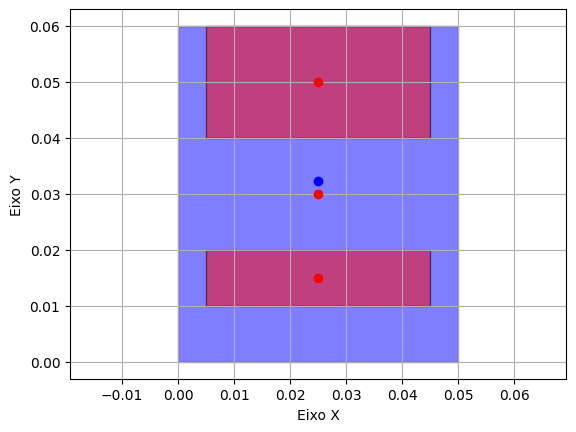

In [ ]:
# Seção composta 3
rect1 = Rectangle(0.05, 0.06, 0.025, 0.03)
rect2 = Rectangle(0.04, 0.02, 0.025, 0.05, negative=True)
rect3 = Rectangle(0.04, 0.01, 0.025, 0.015, negative=True)
section03 = CompositeSection([rect1, rect2, rect3])

# Exibe os resultados para a primeira seção composta (section)
print(f"Centroide (x, y): ({section03.x_centroid:.3e}, {section03.y_centroid:.3e}) metros")
print(f"Momento de Inércia em X: {section03.moment_of_inertia_x():.3e}")
print(f"Momento de Inércia em Y: {section03.moment_of_inertia_y():.3e}")
print(f"Produto de Inércia: {section03.product_of_inertia():.3e}")
section03.plot_section()  # Plota a seção composta

___

# Exemplo 04

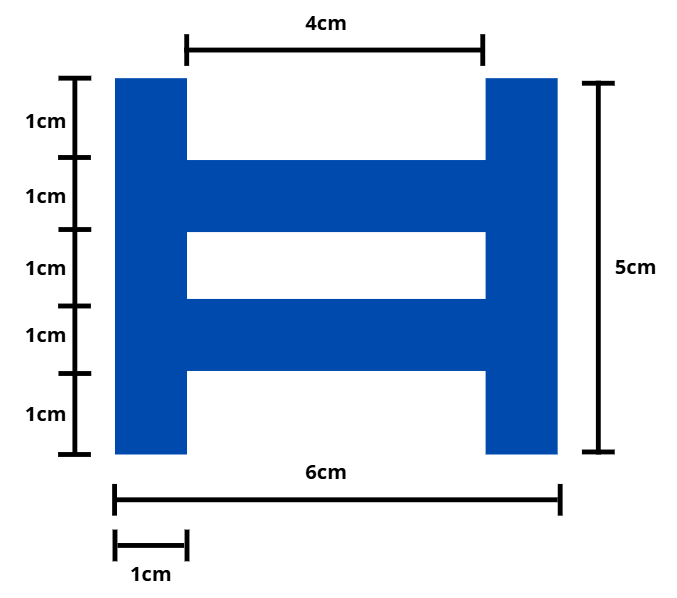

Centroide (x, y): (3.000e-02, 2.500e-02) metros
Momento de Inércia em X: 9.550e-07
Momento de Inércia em Y: 1.060e-06
Produto de Inércia: 7.100e-07


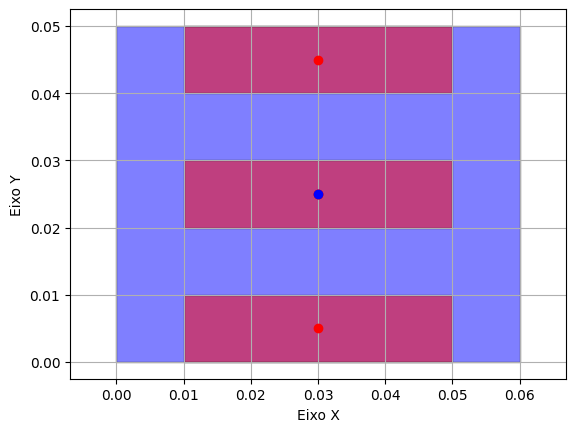

In [ ]:
# Seção composta 4
rect1 = Rectangle(0.06, 0.05, 0.03, 0.025)
rect2 = Rectangle(0.04, 0.01, 0.03, 0.005, negative=True)
rect3 = Rectangle(0.04, 0.01, 0.03, 0.025, negative=True)
rect4 = Rectangle(0.04, 0.01, 0.03, 0.045, negative=True)
section04 = CompositeSection([rect1, rect2, rect3, rect4])

# Exibe os resultados para a primeira seção composta (section)
print(f"Centroide (x, y): ({section04.x_centroid:.3e}, {section04.y_centroid:.3e}) metros")
print(f"Momento de Inércia em X: {section04.moment_of_inertia_x():.3e}")
print(f"Momento de Inércia em Y: {section04.moment_of_inertia_y():.3e}")
print(f"Produto de Inércia: {section04.product_of_inertia():.3e}")
section04.plot_section()  # Plota a seção composta

___

# Exemplo 05

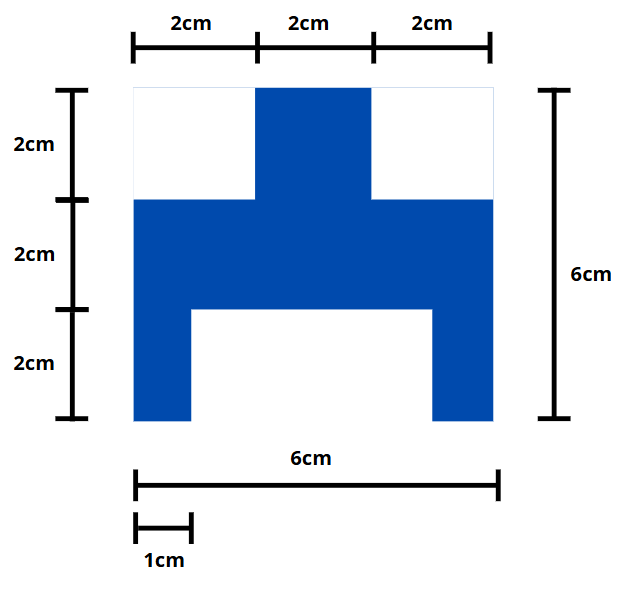

Centroide (x, y): (3.000e-02, 3.000e-02) metros
Momento de Inércia em X: 1.773e-06
Momento de Inércia em Y: 1.533e-06
Produto de Inércia: 1.000e-06


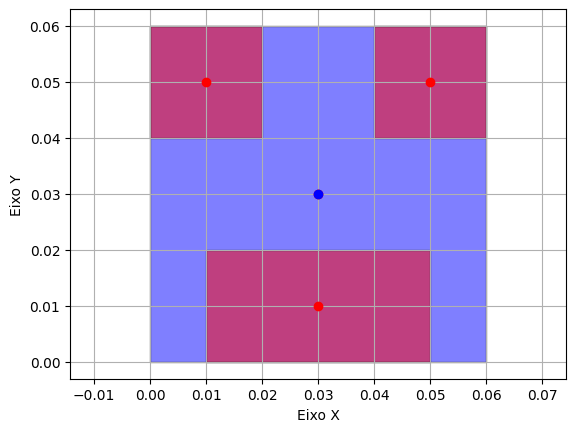

In [ ]:
# Seção composta 5
rect1 = Rectangle(0.06, 0.06, 0.03, 0.03)
rect2 = Rectangle(0.04, 0.02, 0.03, 0.01, negative=True)
rect3 = Rectangle(0.02, 0.02, 0.01, 0.05, negative=True)
rect4 = Rectangle(0.02, 0.02, 0.05, 0.05, negative=True)
section05 = CompositeSection([rect1, rect2, rect3, rect4])

# Exibe os resultados para a primeira seção composta (section)
print(f"Centroide (x, y): ({section05.x_centroid:.3e}, {section05.y_centroid:.3e}) metros")
print(f"Momento de Inércia em X: {section05.moment_of_inertia_x():.3e}")
print(f"Momento de Inércia em Y: {section05.moment_of_inertia_y():.3e}")
print(f"Produto de Inércia: {section05.product_of_inertia():.3e}")
section05.plot_section()  # Plota a seção composta